In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Helper functions for image loading and preprocessing
def load_image(image_path, size=(28, 28)):
    image = Image.open(image_path).convert('L')
    image = image.resize(size)
    image = np.array(image)
    return image

def plot_image(image_array, title=''):
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Padding methods
def cyclic_padding(image, pad_width):
    return np.pad(image, pad_width=pad_width, mode='wrap')

def symmetric_padding(image, pad_width):
    return np.pad(image, pad_width=pad_width, mode='symmetric')

# Quantum Convolution (QuC) with padding
def quantum_convolution(image, kernel, padding, method='cyclic'):
    if method == 'cyclic':
        padded_image = cyclic_padding(image, padding)
    elif method == 'symmetric':
        padded_image = symmetric_padding(image, padding)
    
    # Convolution operation
    kernel_size = kernel.shape[0]
    output_size = (padded_image.shape[0] - kernel_size + 1, padded_image.shape[1] - kernel_size + 1)
    output = np.zeros(output_size)
    
    for i in range(output_size[0]):
        for j in range(output_size[1]):
            output[i, j] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size] * kernel)
    
    return output

# Stride and pooling operations
def conv_with_stride(image, kernel, stride):
    kernel_size = kernel.shape[0]
    output_size = ((image.shape[0] - kernel_size) // stride + 1, (image.shape[1] - kernel_size) // stride + 1)
    output = np.zeros(output_size)
    
    for i in range(0, output_size[0] * stride, stride):
        for j in range(0, output_size[1] * stride, stride):
            if i + kernel_size <= image.shape[0] and j + kernel_size <= image.shape[1]:
                output[i // stride, j // stride] = np.sum(image[i:i+kernel_size, j:j+kernel_size] * kernel)
    
    return output

def conv_with_padding_and_stride(image, kernel, padding, stride):
    padded_image = cyclic_padding(image, padding)
    return conv_with_stride(padded_image, kernel, stride)

# Batch Normalization (BN) operation
def batch_normalization(image, mean, variance, epsilon=1e-5):
    return (image - mean) / np.sqrt(variance + epsilon)

# Weighted kernels and grouped kernels
def apply_weighted_kernels(image, kernels, weights):
    result = np.zeros(image.shape)
    for kernel, weight in zip(kernels, weights):
        result += weight * quantum_convolution(image, kernel, padding=0)
    return result

def apply_grouped_kernels(image, grouped_kernels):
    results = []
    for group in grouped_kernels:
        result = np.zeros(image.shape)
        for kernel in group:
            result += quantum_convolution(image, kernel, padding=0)
        results.append(result)
    return results

# Amplitude Amplification (example placeholder)
def amplitude_amplification(image):
    return image  # Placeholder for actual amplitude amplification implementation

# Entanglement (example placeholder)
def entanglement_operation(image, kernel):
    return quantum_convolution(image, kernel, padding=0)  # Placeholder for actual entanglement implementation

# QFT and its inverse
def quantum_fourier_transform(image):
    # Placeholder for actual QFT implementation
    return np.fft.fft2(image)

def inverse_quantum_fourier_transform(image):
    # Placeholder for actual inverse QFT implementation
    return np.fft.ifft2(image)

# Full QuC with padding and QFT integration
def full_quantum_convolution(image, kernel, padding):
    padded_image = cyclic_padding(image, padding)
    padded_kernel = cyclic_padding(kernel, padding)
    qft_image = quantum_fourier_transform(padded_image)
    qft_kernel = quantum_fourier_transform(padded_kernel)
    qft_result = qft_image * qft_kernel
    result = inverse_quantum_fourier_transform(qft_result)
    return np.real(result)

# Load MNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
mnist_image, _ = trainset[0]
q_mnist_image = np.abs(mnist_image.numpy()[0])

# Load and process the Lenna image
lenna_image = cv2.imread('C:/Users/ACER/Desktop/lena_256.jpg', cv2.IMREAD_GRAYSCALE)
lenna_image = cv2.resize(lenna_image, (28, 28))
q_lenna_image = lenna_image / 255.0

# Load and process the Pepper image
pepper_image = cv2.imread('C:/Users/ACER/Desktop/pepper.jpg', cv2.IMREAD_GRAYSCALE)
pepper_image = cv2.resize(pepper_image, (28, 28))
q_pepper_image = pepper_image / 255.0

# Example of using the defined functions
sample_kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Example kernel
padding = 5
stride = 2

# Processing with padding and stride
padded_mnist_image = cyclic_padding(q_mnist_image, pad_width=padding)
conv_result_mnist = quantum_convolution(q_mnist_image, sample_kernel, padding=padding)
conv_stride_result_mnist = conv_with_padding_and_stride(q_mnist_image, sample_kernel, padding=padding, stride=stride)

padded_lenna_image = cyclic_padding(q_lenna_image, pad_width=padding)
conv_result_lenna = quantum_convolution(q_lenna_image, sample_kernel, padding=padding)
conv_stride_result_lenna = conv_with_padding_and_stride(q_lenna_image, sample_kernel, padding=padding, stride=stride)

padded_pepper_image = cyclic_padding(q_pepper_image, pad_width=padding)
conv_result_pepper = quantum_convolution(q_pepper_image, sample_kernel, padding=padding)
conv_stride_result_pepper = conv_with_padding_and_stride(q_pepper_image, sample_kernel, padding=padding, stride=stride)

# Display results
plot_image(q_mnist_image, title='MNIST Image')
plot_image(conv_result_mnist, title='MNIST Convolution Result')
plot_image(conv_stride_result_mnist, title='MNIST Convolution with Padding and Stride Result')

plot_image(q_lenna_image, title='Lenna Image')
plot_image(conv_result_lenna, title='Lenna Convolution Result')
plot_image(conv_stride_result_lenna, title='Lenna Convolution with Padding and Stride Result')

plot_image(q_pepper_image, title='Pepper Image')
plot_image(conv_result_pepper, title='Pepper Convolution Result')
plot_image(conv_stride_result_pepper, title='Pepper Convolution with Padding and Stride Result')


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


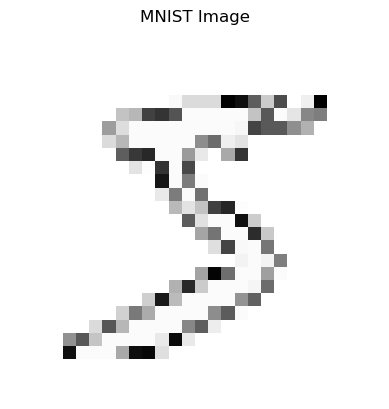

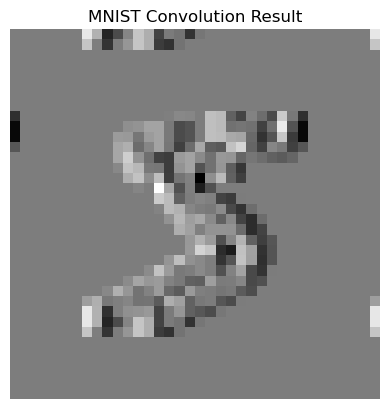

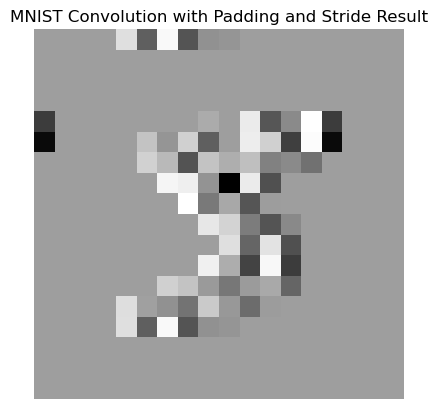

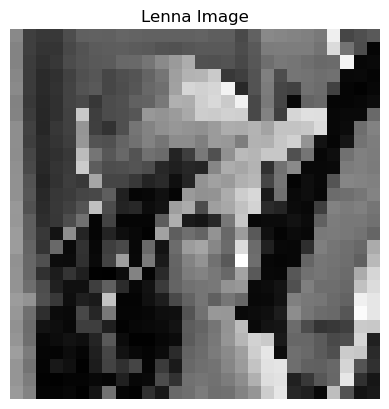

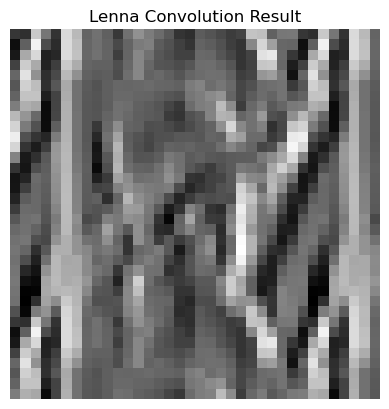

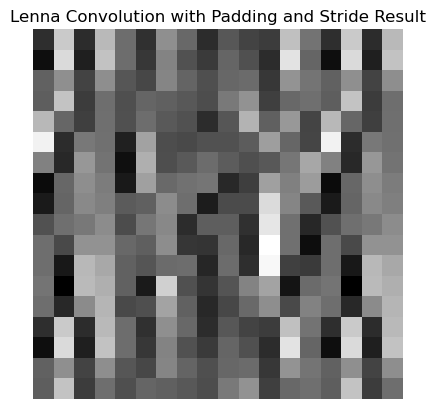

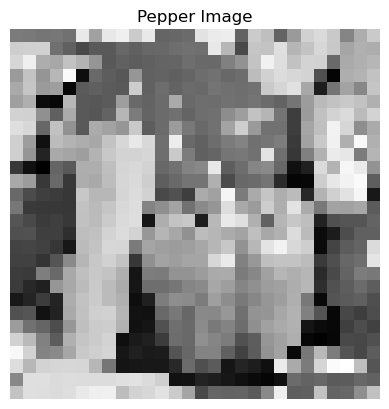

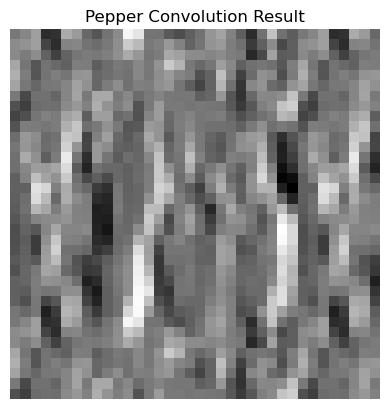

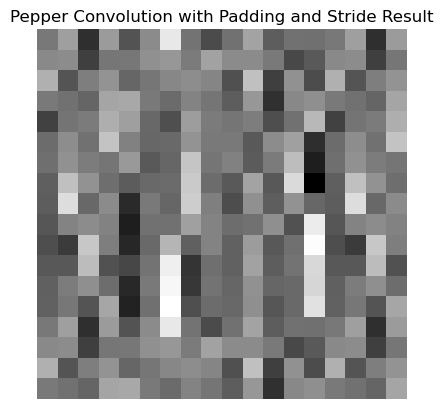

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Helper functions for image loading and preprocessing
def load_image(image_path, size=(28, 28)):
    image = Image.open(image_path).convert('L')
    image = image.resize(size)
    image = np.array(image)
    return image

def plot_image(image_array, title=''):
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Padding methods
def cyclic_padding(image, pad_width):
    return np.pad(image, pad_width=pad_width, mode='wrap')

def symmetric_padding(image, pad_width):
    return np.pad(image, pad_width=pad_width, mode='symmetric')

# Quantum Convolution (QuC) with padding
def quantum_convolution(image, kernel, padding, method='cyclic'):
    if method == 'cyclic':
        padded_image = cyclic_padding(image, padding)
    elif method == 'symmetric':
        padded_image = symmetric_padding(image, padding)
    
    # Convolution operation
    kernel_size = kernel.shape[0]
    output_size = (padded_image.shape[0] - kernel_size + 1, padded_image.shape[1] - kernel_size + 1)
    output = np.zeros(output_size)
    
    for i in range(output_size[0]):
        for j in range(output_size[1]):
            output[i, j] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size] * kernel)
    
    return output

# Stride and pooling operations
def conv_with_stride(image, kernel, stride):
    kernel_size = kernel.shape[0]
    output_size = ((image.shape[0] - kernel_size) // stride + 1, (image.shape[1] - kernel_size) // stride + 1)
    output = np.zeros(output_size)
    
    for i in range(0, output_size[0] * stride, stride):
        for j in range(0, output_size[1] * stride, stride):
            if i + kernel_size <= image.shape[0] and j + kernel_size <= image.shape[1]:
                output[i // stride, j // stride] = np.sum(image[i:i+kernel_size, j:j+kernel_size] * kernel)
    
    return output

def conv_with_padding_and_stride(image, kernel, padding, stride):
    padded_image = cyclic_padding(image, padding)
    return conv_with_stride(padded_image, kernel, stride)

# Batch Normalization (BN) operation
def batch_normalization(image, mean, variance, epsilon=1e-5):
    return (image - mean) / np.sqrt(variance + epsilon)

# Weighted kernels and grouped kernels
def apply_weighted_kernels(image, kernels, weights):
    result = np.zeros(image.shape)
    for kernel, weight in zip(kernels, weights):
        result += weight * quantum_convolution(image, kernel, padding=0)
    return result

def apply_grouped_kernels(image, grouped_kernels):
    results = []
    for group in grouped_kernels:
        result = np.zeros(image.shape)
        for kernel in group:
            result += quantum_convolution(image, kernel, padding=0)
        results.append(result)
    return results

# Amplitude Amplification (example placeholder)
def amplitude_amplification(image):
    return image  # Placeholder for actual amplitude amplification implementation

# Entanglement (example placeholder)
def entanglement_operation(image, kernel):
    return quantum_convolution(image, kernel, padding=0)  # Placeholder for actual entanglement implementation

# QFT and its inverse
def quantum_fourier_transform(image):
    # Placeholder for actual QFT implementation
    return np.fft.fft2(image)

def inverse_quantum_fourier_transform(image):
    # Placeholder for actual inverse QFT implementation
    return np.fft.ifft2(image)

# Full QuC with padding and QFT integration
def full_quantum_convolution(image, kernel, padding):
    padded_image = cyclic_padding(image, padding)
    padded_kernel = cyclic_padding(kernel, padding)
    qft_image = quantum_fourier_transform(padded_image)
    qft_kernel = quantum_fourier_transform(padded_kernel)
    qft_result = qft_image * qft_kernel
    result = inverse_quantum_fourier_transform(qft_result)
    return np.real(result)

# Load MNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
mnist_image, _ = trainset[0]
q_mnist_image = np.abs(mnist_image.numpy()[0])

# Load and process the Lenna image
lenna_image = cv2.imread('C:/Users/ACER/Desktop/lena_256.jpg', cv2.IMREAD_GRAYSCALE)
lenna_image = cv2.resize(lenna_image, (28, 28))
q_lenna_image = lenna_image / 255.0

# Load and process the Pepper image
pepper_image = cv2.imread('C:/Users/ACER/Desktop/download.jpg', cv2.IMREAD_GRAYSCALE)
pepper_image = cv2.resize(pepper_image, (28, 28))
q_pepper_image = pepper_image / 255.0

# Example of using the defined functions
sample_kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Example kernel
padding = 5
stride = 2

# Processing with padding and stride
padded_mnist_image = cyclic_padding(q_mnist_image, pad_width=padding)
conv_result_mnist = quantum_convolution(q_mnist_image, sample_kernel, padding=padding)
conv_stride_result_mnist = conv_with_padding_and_stride(q_mnist_image, sample_kernel, padding=padding, stride=stride)

padded_lenna_image = cyclic_padding(q_lenna_image, pad_width=padding)
conv_result_lenna = quantum_convolution(q_lenna_image, sample_kernel, padding=padding)
conv_stride_result_lenna = conv_with_padding_and_stride(q_lenna_image, sample_kernel, padding=padding, stride=stride)

padded_pepper_image = cyclic_padding(q_pepper_image, pad_width=padding)
conv_result_pepper = quantum_convolution(q_pepper_image, sample_kernel, padding=padding)
conv_stride_result_pepper = conv_with_padding_and_stride(q_pepper_image, sample_kernel, padding=padding, stride=stride)

# Display results
plot_image(q_mnist_image, title='MNIST Image')
plot_image(conv_result_mnist, title='MNIST Convolution Result')
plot_image(conv_stride_result_mnist, title='MNIST Convolution with Padding and Stride Result')

plot_image(q_lenna_image, title='Lenna Image')
plot_image(conv_result_lenna, title='Lenna Convolution Result')
plot_image(conv_stride_result_lenna, title='Lenna Convolution with Padding and Stride Result')

plot_image(q_pepper_image, title='Pepper Image')
plot_image(conv_result_pepper, title='Pepper Convolution Result')
plot_image(conv_stride_result_pepper, title='Pepper Convolution with Padding and Stride Result')


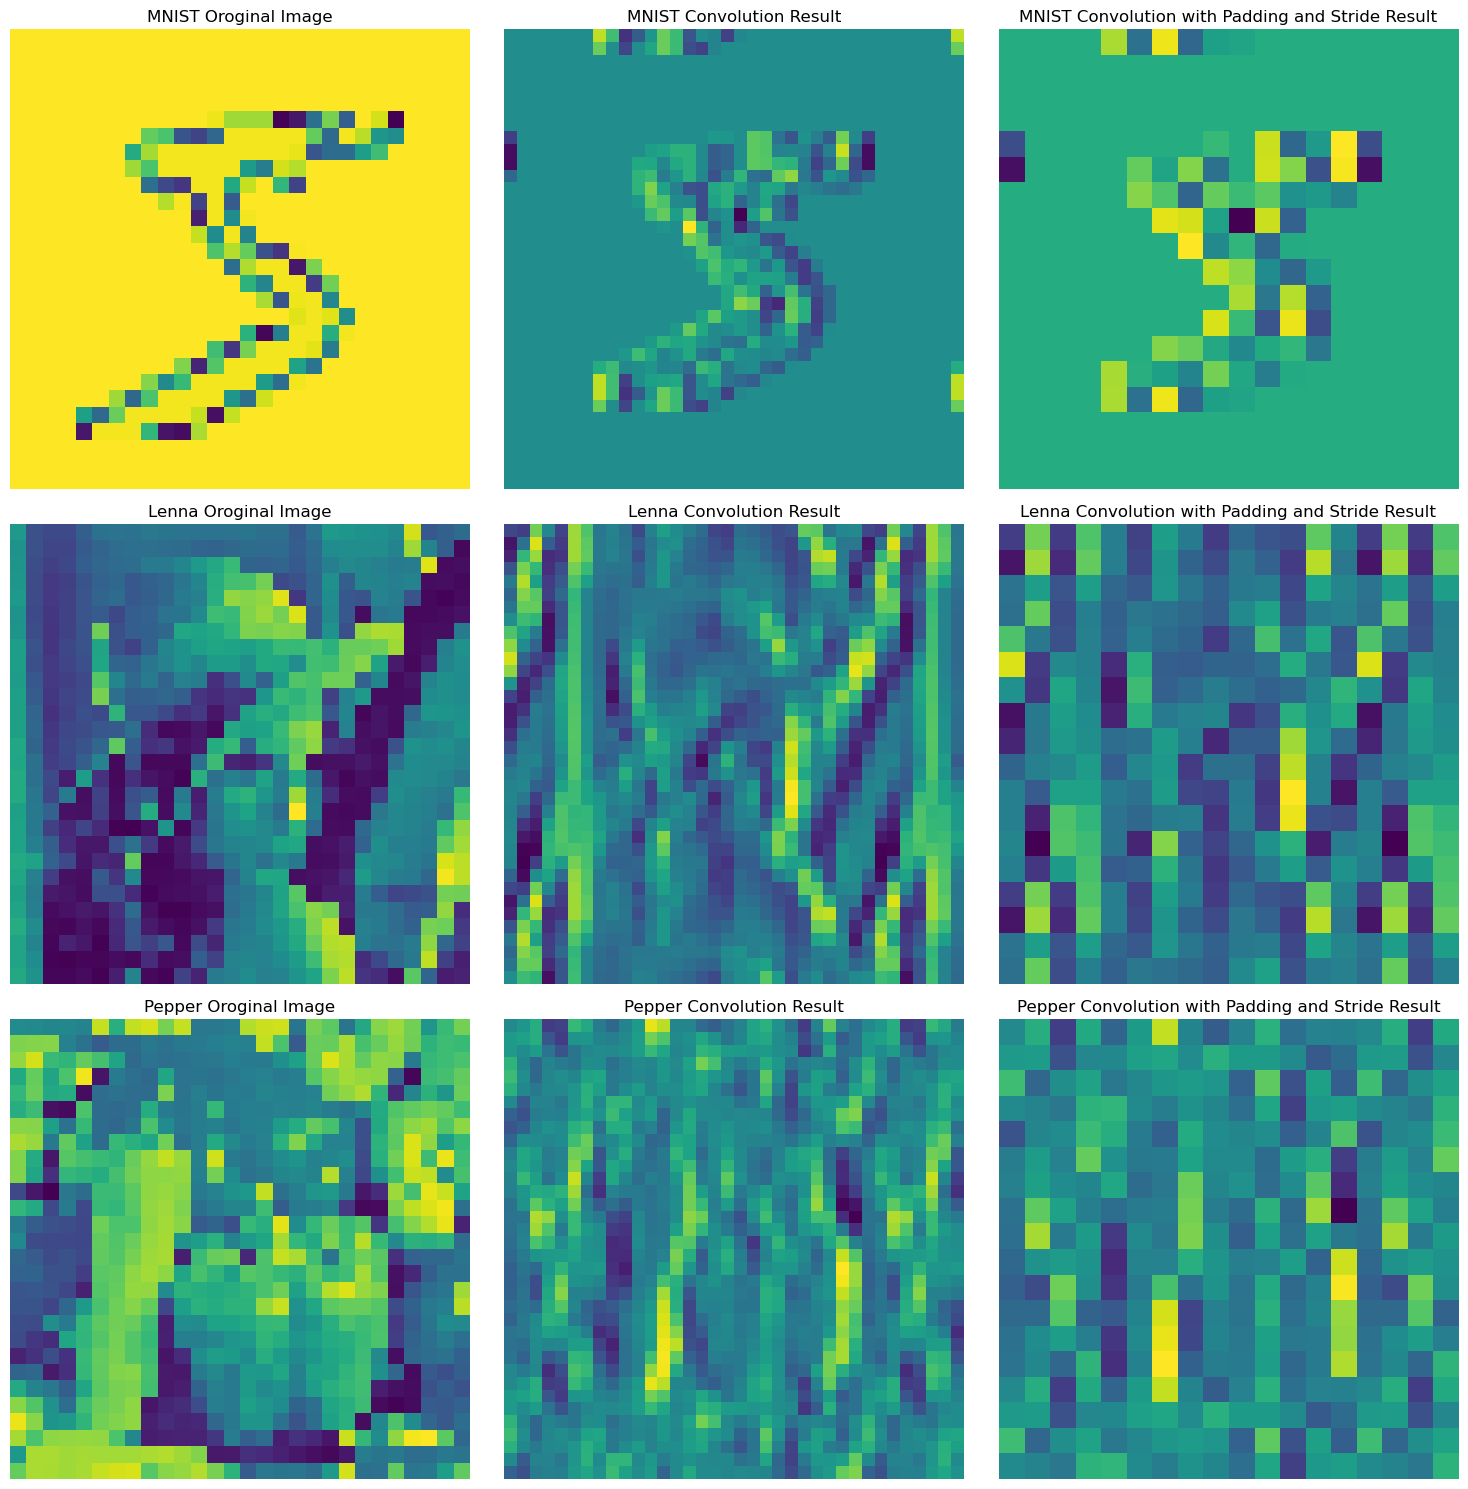

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Helper functions for image loading and preprocessing
def load_image(image_path, size=(28, 28)):
    image = Image.open(image_path).convert('L')
    image = image.resize(size)
    image = np.array(image)
    return image

def plot_images(images, titles, cmap='viridis'):
    num_images = len(images)
    cols = 3
    rows = (num_images + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()
    
    for i in range(num_images):
        axes[i].imshow(images[i], cmap=cmap)
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    
    # Turn off axes for any remaining empty subplots
    for i in range(num_images, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Padding methods
def cyclic_padding(image, pad_width):
    return np.pad(image, pad_width=pad_width, mode='wrap')

def symmetric_padding(image, pad_width):
    return np.pad(image, pad_width=pad_width, mode='symmetric')

# Quantum Convolution (QuC) with padding
def quantum_convolution(image, kernel, padding, method='cyclic'):
    if method == 'cyclic':
        padded_image = cyclic_padding(image, padding)
    elif method == 'symmetric':
        padded_image = symmetric_padding(image, padding)
    
    # Convolution operation
    kernel_size = kernel.shape[0]
    output_size = (padded_image.shape[0] - kernel_size + 1, padded_image.shape[1] - kernel_size + 1)
    output = np.zeros(output_size)
    
    for i in range(output_size[0]):
        for j in range(output_size[1]):
            output[i, j] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size] * kernel)
    
    return output

# Stride and pooling operations
def conv_with_stride(image, kernel, stride):
    kernel_size = kernel.shape[0]
    output_size = ((image.shape[0] - kernel_size) // stride + 1, (image.shape[1] - kernel_size) // stride + 1)
    output = np.zeros(output_size)
    
    for i in range(0, output_size[0] * stride, stride):
        for j in range(0, output_size[1] * stride, stride):
            if i + kernel_size <= image.shape[0] and j + kernel_size <= image.shape[1]:
                output[i // stride, j // stride] = np.sum(image[i:i+kernel_size, j:j+kernel_size] * kernel)
    
    return output

def conv_with_padding_and_stride(image, kernel, padding, stride):
    padded_image = cyclic_padding(image, padding)
    return conv_with_stride(padded_image, kernel, stride)

# Batch Normalization (BN) operation
def batch_normalization(image, mean, variance, epsilon=1e-5):
    return (image - mean) / np.sqrt(variance + epsilon)

# Weighted kernels and grouped kernels
def apply_weighted_kernels(image, kernels, weights):
    result = np.zeros(image.shape)
    for kernel, weight in zip(kernels, weights):
        result += weight * quantum_convolution(image, kernel, padding=0)
    return result

def apply_grouped_kernels(image, grouped_kernels):
    results = []
    for group in grouped_kernels:
        result = np.zeros(image.shape)
        for kernel in group:
            result += quantum_convolution(image, kernel, padding=0)
        results.append(result)
    return results

# Amplitude Amplification (example placeholder)
def amplitude_amplification(image):
    return image  # Placeholder for actual amplitude amplification implementation

# Entanglement (example placeholder)
def entanglement_operation(image, kernel):
    return quantum_convolution(image, kernel, padding=0)  # Placeholder for actual entanglement implementation

# QFT and its inverse
def quantum_fourier_transform(image):
    # Placeholder for actual QFT implementation
    return np.fft.fft2(image)

def inverse_quantum_fourier_transform(image):
    # Placeholder for actual inverse QFT implementation
    return np.fft.ifft2(image)

# Full QuC with padding and QFT integration
def full_quantum_convolution(image, kernel, padding):
    padded_image = cyclic_padding(image, padding)
    padded_kernel = cyclic_padding(kernel, padding)
    qft_image = quantum_fourier_transform(padded_image)
    qft_kernel = quantum_fourier_transform(padded_kernel)
    qft_result = qft_image * qft_kernel
    result = inverse_quantum_fourier_transform(qft_result)
    return np.real(result)

# Load MNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
mnist_image, _ = trainset[0]
q_mnist_image = np.abs(mnist_image.numpy()[0])

# Load and process the Lenna image
lenna_image_path = 'C:/Users/ACER/Desktop/lena_256.jpg'
lenna_image = cv2.imread(lenna_image_path, cv2.IMREAD_GRAYSCALE)
if lenna_image is None:
    raise ValueError(f"Error loading Lenna image from path: {lenna_image_path}")
lenna_image = cv2.resize(lenna_image, (28, 28))
q_lenna_image = lenna_image / 255.0

# Load and process the Pepper image
pepper_image_path = 'C:/Users/ACER/Desktop/download.jpg'
pepper_image = cv2.imread(pepper_image_path, cv2.IMREAD_GRAYSCALE)
if pepper_image is None:
    raise ValueError(f"Error loading Pepper image from path: {pepper_image_path}")
pepper_image = cv2.resize(pepper_image, (28, 28))
q_pepper_image = pepper_image / 255.0

# Example of using the defined functions
sample_kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Example kernel
padding = 5
stride = 2

# Processing with padding and stride
padded_mnist_image = cyclic_padding(q_mnist_image, pad_width=padding)
conv_result_mnist = quantum_convolution(q_mnist_image, sample_kernel, padding=padding)
conv_stride_result_mnist = conv_with_padding_and_stride(q_mnist_image, sample_kernel, padding=padding, stride=stride)

padded_lenna_image = cyclic_padding(q_lenna_image, pad_width=padding)
conv_result_lenna = quantum_convolution(q_lenna_image, sample_kernel, padding=padding)
conv_stride_result_lenna = conv_with_padding_and_stride(q_lenna_image, sample_kernel, padding=padding, stride=stride)

padded_pepper_image = cyclic_padding(q_pepper_image, pad_width=padding)
conv_result_pepper = quantum_convolution(q_pepper_image, sample_kernel, padding=padding)
conv_stride_result_pepper = conv_with_padding_and_stride(q_pepper_image, sample_kernel, padding=padding, stride=stride)

# Display results in a grid
images = [
    q_mnist_image, conv_result_mnist, conv_stride_result_mnist,
    q_lenna_image, conv_result_lenna, conv_stride_result_lenna,
    q_pepper_image, conv_result_pepper, conv_stride_result_pepper
]
titles = [
    'MNIST Oroginal Image', 'MNIST Convolution Result', 'MNIST Convolution with Padding and Stride Result',
    'Lenna Oroginal Image', 'Lenna Convolution Result', 'Lenna Convolution with Padding and Stride Result',
    'Pepper Oroginal Image', 'Pepper Convolution Result', 'Pepper Convolution with Padding and Stride Result'
]

plot_images(images, titles, cmap='viridis')
